# Exploratory Data Analysis

## 01_Exploracion_General

### Librerias

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys
import nbformat
from scipy.stats import ttest_rel

### Funciones

In [70]:

sys.path.append('../src/')
import functions as f
sys.path.remove('../src/')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.width', 10000)

## Objetivos del Análisis Exploratorio de Datos (EDA)

### Contexto del Dataset

El dataset application_data pertenece a un banco especializado en la concesión de diversos tipos de préstamos a clientes. Cada instancia en el dataset representa una solicitud de préstamo, lo que implica que cada fila se refiere a un cliente único. Este dataset contiene información detallada sobre las solicitudes de préstamos, incluyendo factores demográficos, financieros y otros indicadores relevantes para evaluar el riesgo crediticio de los solicitantes.

Es importante destacar que los datos son anónimos para proteger la privacidad de los clientes y no contienen información confidencial. Este dataset nos permitirá analizar patrones relacionados con las características de los solicitantes y la probabilidad de que devuelvan o no un préstamo. Los datos son reales, representativos del dominio financiero, y ofrecen una excelente oportunidad para desarrollar análisis predictivos.



El modelo se ejecutará al momento de la solicitud del préstamo, utilizando únicamente las variables disponibles en ese instante. Esto incluye datos proporcionados por el cliente, como información financiera, demográfica y laboral, así como cualquier otro dato recopilado antes de tomar la decisión de aprobación. Variables que dependan del comportamiento posterior a la aprobación del préstamo serán excluidas.

### Objetivos del análisis

El objetivo de este análisis es preparar los datos de cara a desarrollar un modelo predictivo que permita identificar clientes con mayor probabilidad de incumplir con el pago de su préstamo, e incluso ser capaces de extraer conclusiones de este tipo utilizando únicamente la información obtenida del EDA. Queremos responder a la siquiente pregunta : ¿Hay algún tipo de cliente más propenso a no devolver un préstamo? Queremos comprender y analizar los patrones presentes en el conjunto de datos relacionado con solicitudes de préstamos. 



## Carga y análisis de los datos

In [71]:
# Cargar datos
ruta="../data/application_data.csv"
pd_data = pd.read_csv(ruta).set_index('SK_ID_CURR')
pd_data.head()
print(pd_data.drop_duplicates().shape)

(307511, 121)


Vemos que *data['SK_ID_CURR'].nunique()* = 307511, el mismo número de filas de nuestro dataset, por lo que es una columna de identificación única, y la asignamos como *index*.

In [72]:
# Importamos también el diccionario de datos
var_description = pd.read_excel('../data//columns_description.xlsx')
var_description.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


## Variables a futuro

En este paso, se busca identificar si alguna columna contiene información que solo estaría disponible después de un evento específico. Esto es crucial, ya que incluir este tipo de datos en el modelo generaría un sesgo hacia resultados inalcanzables en un escenario real. Para detectar estas variables, se debe realizar un análisis manual, revisando cuidadosamente los nombres y las descripciones de las columnas, evaluando si alguna parece anticipar eventos futuros.

En nuestro caso específico, hemos determinado que no existe ninguna columna que contenga información disponible únicamente después de un evento futuro. Esto se debe a que nuestro modelo está diseñado para ejecutarse en el momento de la solicitud del préstamo, basándose exclusivamente en la información disponible en ese instante. Por lo tanto, todas las variables utilizadas reflejan condiciones y datos actuales del solicitante, este análisis asegura que los resultados del modelo sean consistentes y que puedan aplicarse directamente en escenarios reales.

# Exploración de la variable objetivo

In [73]:
data_target = pd_data['TARGET']\
    .value_counts(normalize=True)\
    .mul(100).rename('percent').reset_index()

data_target_conteo=pd_data['TARGET'].value_counts()
data_plot_target = pd.merge(data_target, data_target_conteo, on='TARGET')
data_plot_target

,TARGET,percent,count
0,0,91.927118,282686
1,1,8.072882,24825


La variable *'TARGET'* es la que nos va a indicar si un cliente ha incurrido en un impago o no.
Como podemos ver, está bastante desbalanceada, ya que solo el 8.07% de los casos corresponden a impagos.

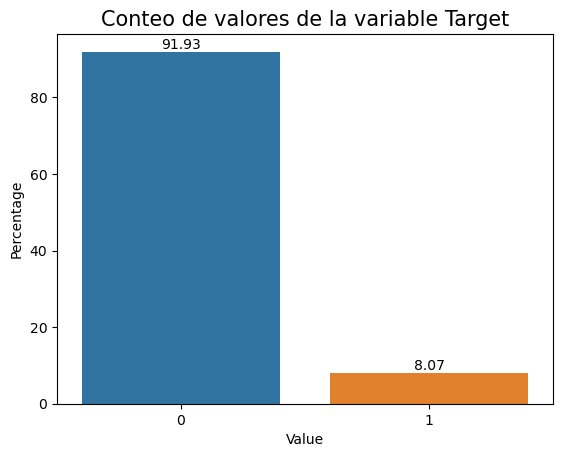

In [74]:
fig, ax = plt.subplots()
sns.barplot(data=data_plot_target, x='TARGET', y='percent', ax=ax, hue='TARGET', legend=False)
ax.set_title('Conteo de valores de la variable Target', fontdict={'fontsize':15}) #,'fontname':'Montserrat','weight':'bold'
ax.set_ylabel('Percentage')
ax.set_xlabel('Value')
for i in ax.containers:
    ax.bar_label(i,fmt='{:,.2f}')
plt.show()

## Dimensiones de la tabla

Empezaremos con un análisis exploratorio inicial para comprender la estructura general del dataset. Esto es necesario para ver la cantidad y el tipo de datos que tenemos, verificar la existencia de nulos, y otras características generales del dataset. Esta información es crucial para planificar las estrategias de tratamiento y transformación necesarias para el análisis posterior.

In [75]:
print("Dimensiones del dataset:", pd_data.shape)

Dimensiones del dataset: (307511, 121)


El dataset contiene 302,511 instancias y 122 variables

In [76]:
f.duplicate_columns(pd_data)

[]

El análisis confirma que no existen columnas duplicadas, lo que indica que no hay redundancias evidentes en la estructura del dataset.

In [77]:
pd_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 307511 entries, 100002 to 456255
Data columns (total 121 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    TARGET                        307511 non-null  int64  
 1    NAME_CONTRACT_TYPE            307511 non-null  object 
 2    CODE_GENDER                   307511 non-null  object 
 3    FLAG_OWN_CAR                  307511 non-null  object 
 4    FLAG_OWN_REALTY               307511 non-null  object 
 5    CNT_CHILDREN                  307511 non-null  int64  
 6    AMT_INCOME_TOTAL              307511 non-null  float64
 7    AMT_CREDIT                    307511 non-null  float64
 8    AMT_ANNUITY                   307499 non-null  float64
 9    AMT_GOODS_PRICE               307233 non-null  float64
 10   NAME_TYPE_SUITE               306219 non-null  object 
 11   NAME_INCOME_TYPE              307511 non-null  object 
 12   NAME_EDUCATION_TYPE         

In [78]:
pd_data.isna().sum()

TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

El análisis inicial muestra algunas variables con valores faltantes significativos, como por ejemplo *AMT_REQ_CREDIT_BUREAU_WEEK* con 41519 valores faltantes, o *OWN_CAR_AGE* con 203,929, mientras que otras están completas.

In [79]:
# Descripción estadística de datos numéricos
print("\nResumen estadístico de variables numéricas:\n", pd_data.describe())


Resumen estadístico de variables numéricas:
               TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE 

El resumen estadístico revela que la mayoría de las variables tienen distribuciones asimétricas con valores atípicos, como por ejemplo, *AMT_INCOME_TOTAL* muestra un máximo de 117 millones, mucho mayor que la mediana de 112,500. Estas discrepancias pueden afectar la interpretación de las correlaciones y el desempeño del modelo si no se normalizan o transforman adecuadamente.

In [80]:
print("\nTipos de datos:\n", pd_data.dtypes.to_dict())


Tipos de datos:
 {'TARGET': dtype('int64'), 'NAME_CONTRACT_TYPE': dtype('O'), 'CODE_GENDER': dtype('O'), 'FLAG_OWN_CAR': dtype('O'), 'FLAG_OWN_REALTY': dtype('O'), 'CNT_CHILDREN': dtype('int64'), 'AMT_INCOME_TOTAL': dtype('float64'), 'AMT_CREDIT': dtype('float64'), 'AMT_ANNUITY': dtype('float64'), 'AMT_GOODS_PRICE': dtype('float64'), 'NAME_TYPE_SUITE': dtype('O'), 'NAME_INCOME_TYPE': dtype('O'), 'NAME_EDUCATION_TYPE': dtype('O'), 'NAME_FAMILY_STATUS': dtype('O'), 'NAME_HOUSING_TYPE': dtype('O'), 'REGION_POPULATION_RELATIVE': dtype('float64'), 'DAYS_BIRTH': dtype('int64'), 'DAYS_EMPLOYED': dtype('int64'), 'DAYS_REGISTRATION': dtype('float64'), 'DAYS_ID_PUBLISH': dtype('int64'), 'OWN_CAR_AGE': dtype('float64'), 'FLAG_MOBIL': dtype('int64'), 'FLAG_EMP_PHONE': dtype('int64'), 'FLAG_WORK_PHONE': dtype('int64'), 'FLAG_CONT_MOBILE': dtype('int64'), 'FLAG_PHONE': dtype('int64'), 'FLAG_EMAIL': dtype('int64'), 'OCCUPATION_TYPE': dtype('O'), 'CNT_FAM_MEMBERS': dtype('float64'), 'REGION_RATING_CL

El dataset incluye variables categóricas y numéricas, siendo estas últimas una proporción significativa. Esto implica que las estrategias de procesamiento deben adaptarse según el tipo de dato.

## Tipos de variables

In [81]:
pd_data.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,int64,40
1,float64,65
2,object,16


### Analizar que variables pueden ser categóricas y numéricas
En este paso, categorizamos las columnas como numéricas o categóricas de manera intuitiva. También podemos revisar la cantidad de valores únicos para cada columna para ver si una variable numérica podría ser tratada como categórica.

In [82]:
#Identificar columnas categóricas y numéricas de manera intuitiva
num_columns = pd_data.select_dtypes(include=['float64', 'int64']).columns
cat_columns = pd_data.select_dtypes(include=['object']).columns
print("Columnas numéricas:", num_columns)
print("Columnas categóricas:", cat_columns)

Columnas numéricas: Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=105)
Columnas categóricas: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype='object')


Sabemos que existen variables que, aunque son de tipo numérico, representan categorías (como las flags binarias en el dataset). Por ello, aplicaremos una función que evalúe aquellas variables con menos de 100 valores únicos, clasificándolas como categóricas. El resto de variables serán consideradas como numéricas.

In [83]:
list_cat_vars, other = f.dame_variables_categoricas(dataset=pd_data)
print(len(list_cat_vars))
pd_data[list_cat_vars].head()

53


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,1,0,Laborers,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100003,0,Cash loans,F,N,N,0,Family,State servant,Higher education,Married,House / apartment,1,1,0,1,1,0,Core staff,1,1,MONDAY,11,0,0,0,0,0,0,School,reg oper account,block of flats,Block,No,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100004,0,Revolving loans,M,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,1,1,0,Laborers,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100006,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,1,0,0,Laborers,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100007,0,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,0,0,Core staff,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Hemos identificado que hay 16 variables categóricas en esta evaluación inicial (tendriamos 53 variables categóricas en eL dataset). A continuación, mostramos las primeras filas de estas variables categorizadas para verificar su naturaleza y consistencia.

Sin embargo, dado que esta función podría no ser completamente precisa al clasificar ciertas variables (por ejemplo, flags o códigos específicos), aplicaremos una revisión adicional para asegurar una correcta categorización y evitar inconsistencias.

In [84]:
lista_tipos_var=f.tipos_vars(pd_data)
print(lista_tipos_var)

TARGET (boolean) :  [1 0]
NAME_CONTRACT_TYPE (boolean) :  ['Cash loans' 'Revolving loans']
CODE_GENDER (categoric) (Type: object): ['M' 'F' 'XNA']
FLAG_OWN_CAR (boolean) :  ['N' 'Y']
FLAG_OWN_REALTY (boolean) :  ['Y' 'N']
CNT_CHILDREN (categoric) (Type: int64): [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL (numeric) : Range = [25650.00 to 117000000.00], Mean = 168797.92
AMT_CREDIT (numeric) : Range = [45000.00 to 4050000.00], Mean = 599026.00
AMT_ANNUITY (numeric) : Range = [1615.50 to 258025.50], Mean = 27108.57
AMT_GOODS_PRICE (numeric) : Range = [40500.00 to 4050000.00], Mean = 538396.21
NAME_TYPE_SUITE (categoric) (Type: object): ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE (categoric) (Type: object): ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE (categoric) (Type: object): ['Secondary / secondary speci

In [85]:
print(type(lista_tipos_var))
for i in lista_tipos_var:
    print(len(i))

<class 'tuple'>
37
35
49


Tras un análisis exhaustivo, podemos clasificar las variables en 37 booleanas, 35 categóricas y 49 numéricas. Sin embargo, observamos que algunas de las variables que hemos clasificado como categóricas podrían ser también numéricas, y de hecho vamos a considerarlas como tal. Estas variables son las que tienen que ver con la información normalizada sobre el edificio en el que vive el cliente,  el número de hijos y familiares, las instancias de fraude en el círculo social de la persona, la cantidad de consultas sobre el cliente a la oficina de crédito, y la hora del día en que se realizó la solicitud (vamos a considerar el día de la semana como variable categórica). Después de tomar esta consideración, habría 37 variables booleanas, 13 categóricas (las booleanas son una subcategoría más restrictiva de las categóricas, por lo que podemos decir que hay 50 variables categóricas) y 72 variables numéricas.

Una vez visto esto, vamos a tomar algunas decisiones respecto al dataset, en particular, queremos ver si se puede reducir la dimensión del mismo eliminando alguna columna. Las candidatas son aquellas que aportan información sobre el edificio del cliente, que tienen sufijos *_AVG*, *_MODE* y *_MEDI* (media, moda y mediana), y que si aportan la misma información, se podrían condensar en una sola.
Para esto, lo primero que hacemos es utilizar una función que hemos creado para comprobar que los valores missing de cada trío están en las mismas líneas, ya que en caso contrario perderíamos información al quedarnos con una sola columna.

In [86]:
print(f.find_missing_value_mismatches(pd_data))

[]


Dado que los valores faltantes de las columnas _AVG, _MODE y MEDI coinciden, comparamos los datos entre si para evaluar si aportan la misma información relevante. Esto nos permitiría reducir la dimensionalidad del dataset sin perder información significativa.

ELEVATORS_AVG - Mean: 0.08, Std Dev: 0.13
ELEVATORS_MODE - Mean: 0.07, Std Dev: 0.13
ELEVATORS_MEDI - Mean: 0.08, Std Dev: 0.13


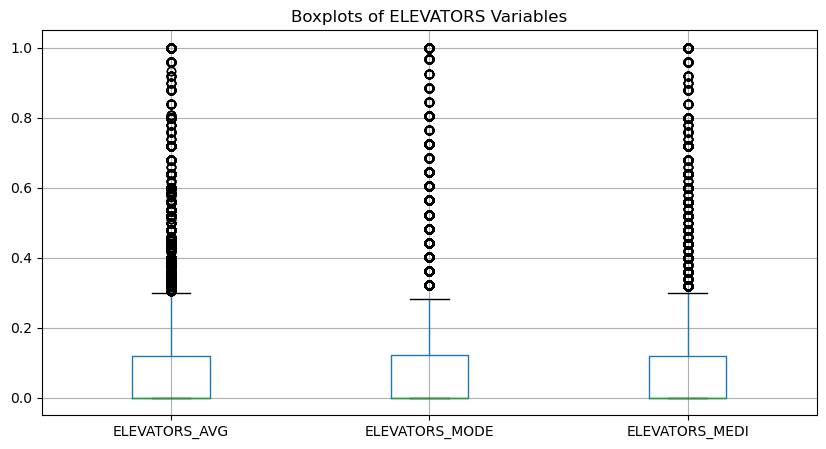

ENTRANCES_AVG - Mean: 0.15, Std Dev: 0.10
ENTRANCES_MODE - Mean: 0.15, Std Dev: 0.10
ENTRANCES_MEDI - Mean: 0.15, Std Dev: 0.10


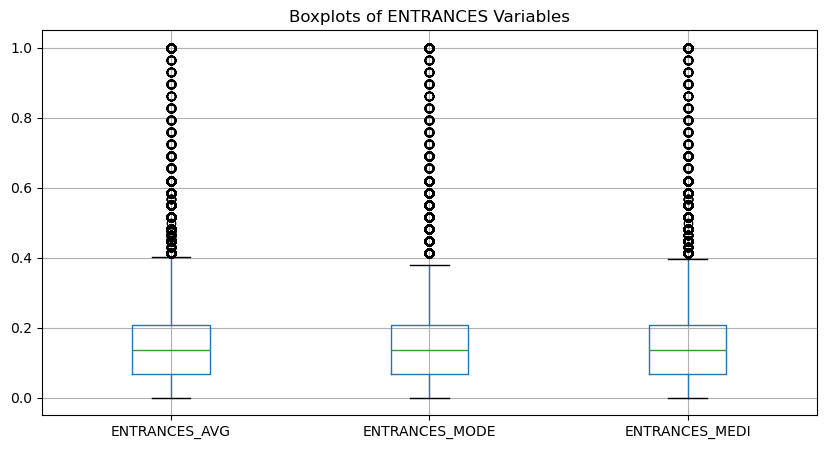

FLOORSMAX_AVG - Mean: 0.23, Std Dev: 0.14
FLOORSMAX_MODE - Mean: 0.22, Std Dev: 0.14
FLOORSMAX_MEDI - Mean: 0.23, Std Dev: 0.15


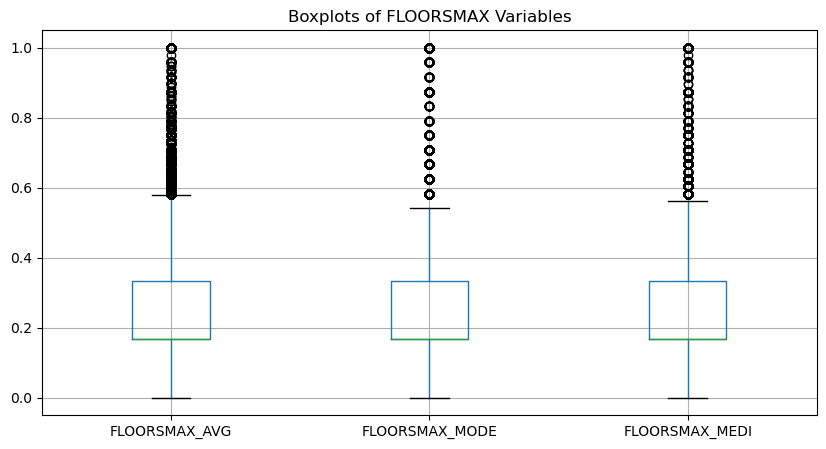

FLOORSMIN_AVG - Mean: 0.23, Std Dev: 0.16
FLOORSMIN_MODE - Mean: 0.23, Std Dev: 0.16
FLOORSMIN_MEDI - Mean: 0.23, Std Dev: 0.16


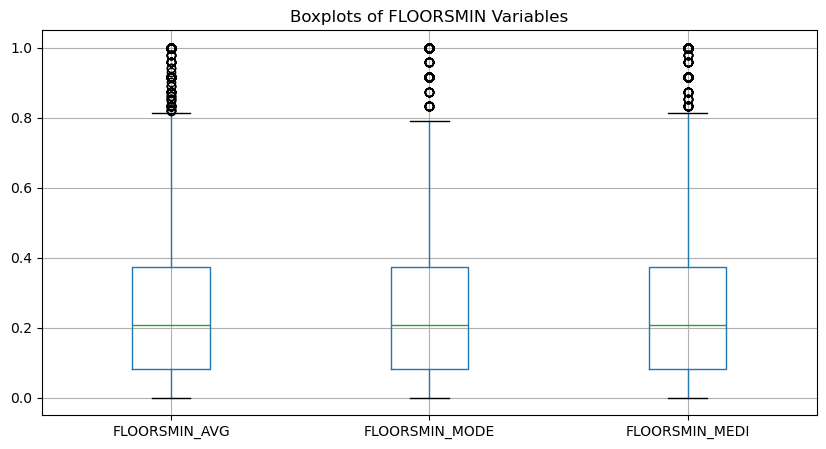

BASEMENTAREA_AVG - Mean: 0.09, Std Dev: 0.08
BASEMENTAREA_MODE - Mean: 0.09, Std Dev: 0.08
BASEMENTAREA_MEDI - Mean: 0.09, Std Dev: 0.08


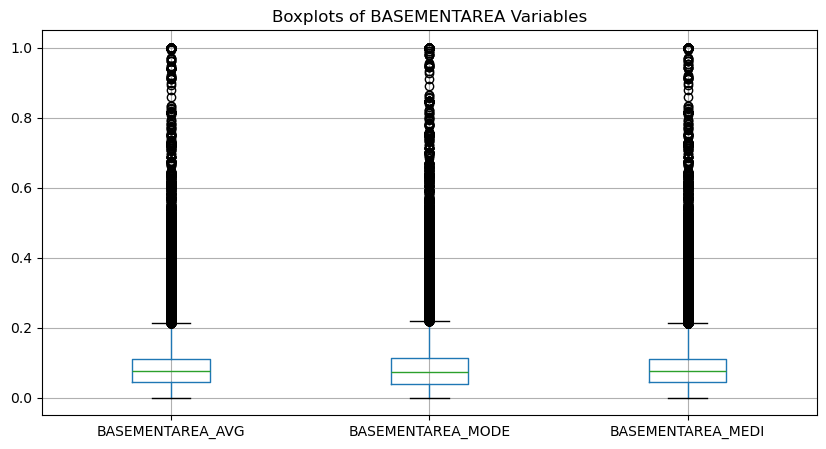

APARTMENTS_AVG - Mean: 0.12, Std Dev: 0.11
APARTMENTS_MODE - Mean: 0.11, Std Dev: 0.11
APARTMENTS_MEDI - Mean: 0.12, Std Dev: 0.11


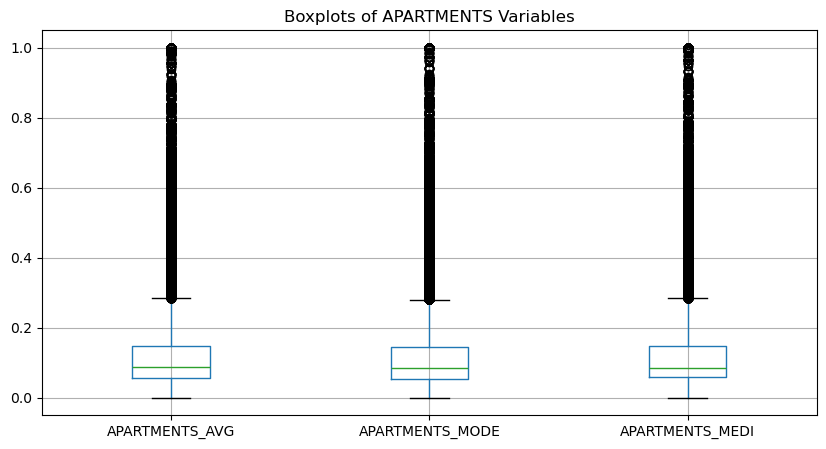

YEARS_BEGINEXPLUATATION_AVG - Mean: 0.98, Std Dev: 0.06
YEARS_BEGINEXPLUATATION_MODE - Mean: 0.98, Std Dev: 0.06
YEARS_BEGINEXPLUATATION_MEDI - Mean: 0.98, Std Dev: 0.06


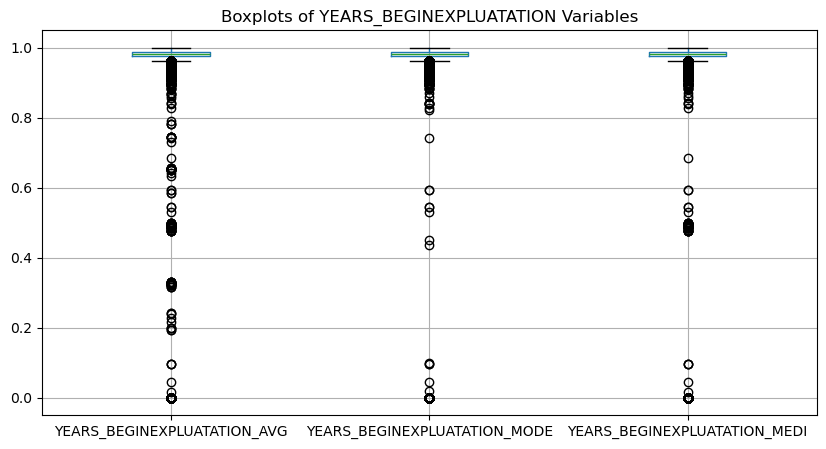

YEARS_BUILD_AVG - Mean: 0.75, Std Dev: 0.11
YEARS_BUILD_MODE - Mean: 0.76, Std Dev: 0.11
YEARS_BUILD_MEDI - Mean: 0.76, Std Dev: 0.11


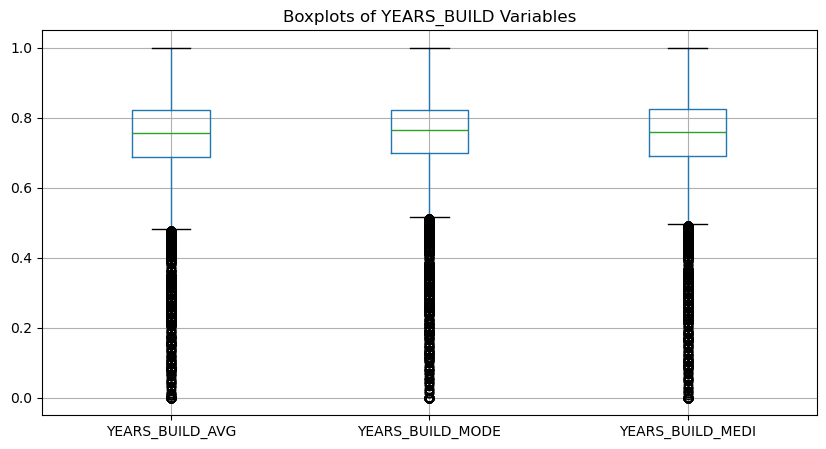

COMMONAREA_AVG - Mean: 0.04, Std Dev: 0.08
COMMONAREA_MODE - Mean: 0.04, Std Dev: 0.07
COMMONAREA_MEDI - Mean: 0.04, Std Dev: 0.08


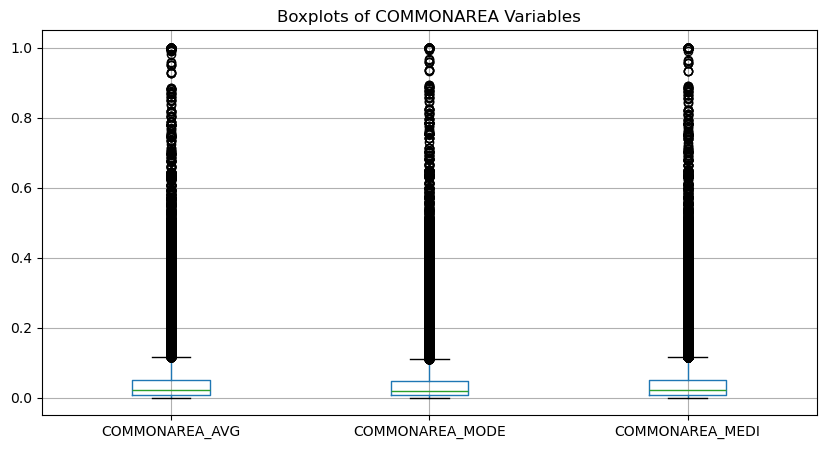

LANDAREA_AVG - Mean: 0.07, Std Dev: 0.08
LANDAREA_MODE - Mean: 0.06, Std Dev: 0.08
LANDAREA_MEDI - Mean: 0.07, Std Dev: 0.08


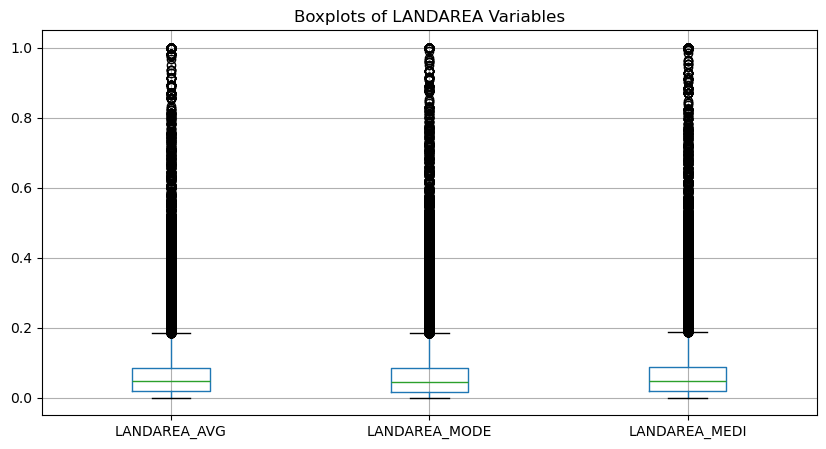

LIVINGAPARTMENTS_AVG - Mean: 0.10, Std Dev: 0.09
LIVINGAPARTMENTS_MODE - Mean: 0.11, Std Dev: 0.10
LIVINGAPARTMENTS_MEDI - Mean: 0.10, Std Dev: 0.09


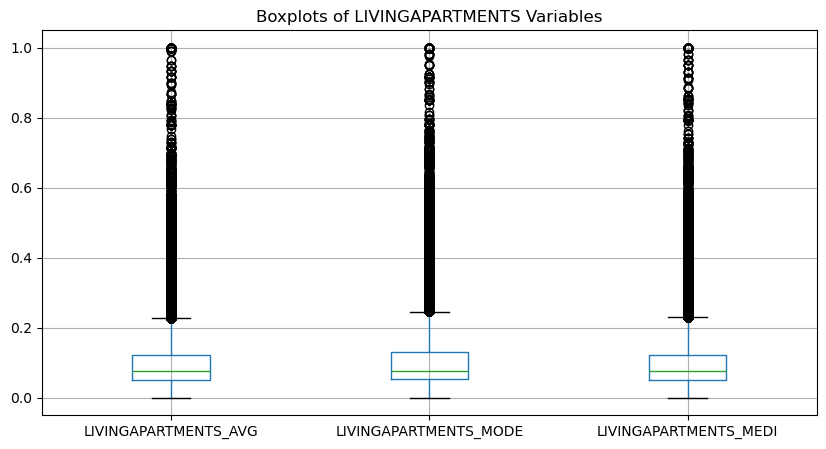

LIVINGAREA_AVG - Mean: 0.11, Std Dev: 0.11
LIVINGAREA_MODE - Mean: 0.11, Std Dev: 0.11
LIVINGAREA_MEDI - Mean: 0.11, Std Dev: 0.11


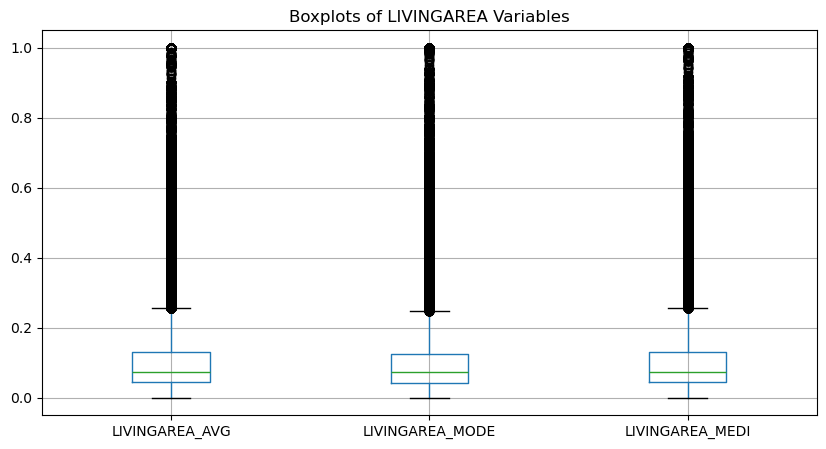

NONLIVINGAPARTMENTS_AVG - Mean: 0.01, Std Dev: 0.05
NONLIVINGAPARTMENTS_MODE - Mean: 0.01, Std Dev: 0.05
NONLIVINGAPARTMENTS_MEDI - Mean: 0.01, Std Dev: 0.05


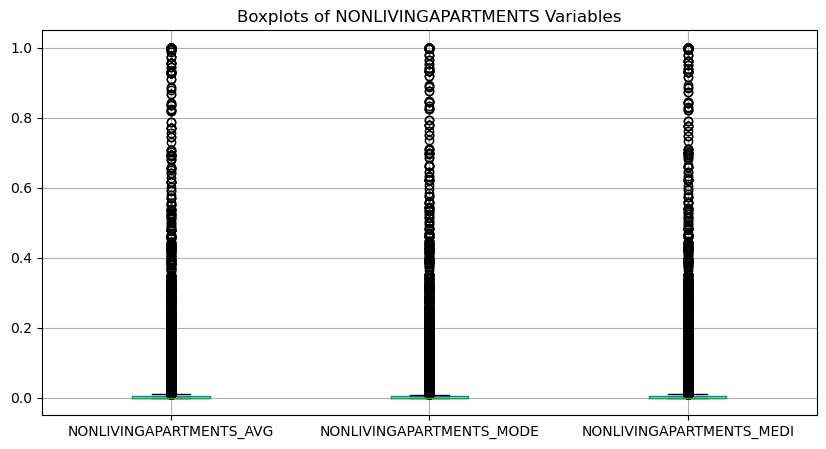

NONLIVINGAREA_AVG - Mean: 0.03, Std Dev: 0.07
NONLIVINGAREA_MODE - Mean: 0.03, Std Dev: 0.07
NONLIVINGAREA_MEDI - Mean: 0.03, Std Dev: 0.07


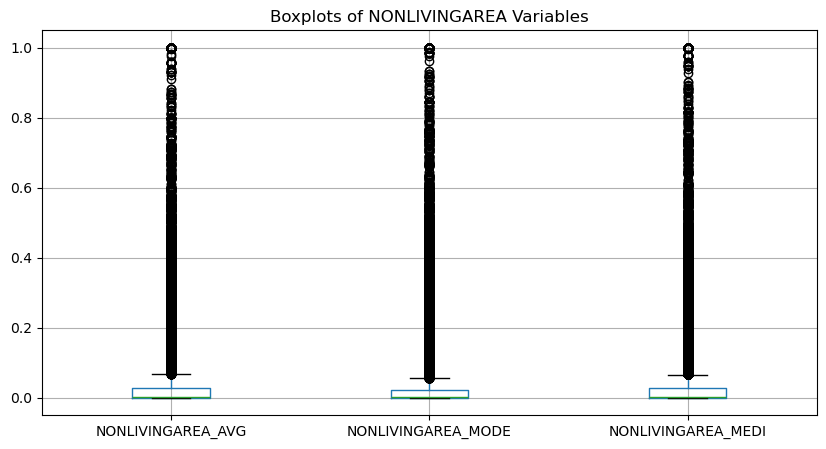

In [87]:
# List of prefixes to consider
prefixes = [
    'ELEVATORS', 'ENTRANCES', 'FLOORSMAX', 'FLOORSMIN', 'BASEMENTAREA', 'APARTMENTS',
    'YEARS_BEGINEXPLUATATION', 'YEARS_BUILD', 'COMMONAREA', 'LANDAREA', 'LIVINGAPARTMENTS',
    'LIVINGAREA', 'NONLIVINGAPARTMENTS', 'NONLIVINGAREA'
]

# Suffixes to consider
suffixes = ['_AVG', '_MODE', '_MEDI']

f.analyze_and_plot(pd_data, prefixes, suffixes)

Tras analizar la información que contienen las columnas *_AVG*, *_MODE* y *_MEDI*, confirmamos que aportan prácticamente la misma información en todos los casos, por ello, para optimizar el modelo y reducir la dimensionalidad del dataset, hemos decidido conservar únicamente la columna *_AVG*, y eliminamos las columnas *_MODE* y *_MEDI*.

In [88]:
pd_data=f.drop_mode_medi_columns(pd_data, prefixes)
pd_data.shape

(307511, 93)

In [89]:
pd_data_bool, pd_data_cat, pd_data_num = f.tipos_vars(pd_data, False)

pd_data_bool, pd_data_cat, pd_data_num

(['TARGET',
  'NAME_CONTRACT_TYPE',
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'FLAG_MOBIL',
  'FLAG_EMP_PHONE',
  'FLAG_WORK_PHONE',
  'FLAG_CONT_MOBILE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'REG_REGION_NOT_LIVE_REGION',
  'REG_REGION_NOT_WORK_REGION',
  'LIVE_REGION_NOT_WORK_REGION',
  'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
  'EMERGENCYSTATE_MODE',
  'FLAG_DOCUMENT_2',
  'FLAG_DOCUMENT_3',
  'FLAG_DOCUMENT_4',
  'FLAG_DOCUMENT_5',
  'FLAG_DOCUMENT_6',
  'FLAG_DOCUMENT_7',
  'FLAG_DOCUMENT_8',
  'FLAG_DOCUMENT_9',
  'FLAG_DOCUMENT_10',
  'FLAG_DOCUMENT_11',
  'FLAG_DOCUMENT_12',
  'FLAG_DOCUMENT_13',
  'FLAG_DOCUMENT_14',
  'FLAG_DOCUMENT_15',
  'FLAG_DOCUMENT_16',
  'FLAG_DOCUMENT_17',
  'FLAG_DOCUMENT_18',
  'FLAG_DOCUMENT_19',
  'FLAG_DOCUMENT_20',
  'FLAG_DOCUMENT_21'],
 ['CODE_GENDER',
  'CNT_CHILDREN',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'OCCUPATION_TYPE',
  '

In [90]:
var_types_count = pd.DataFrame([['Boolean',len(pd_data_bool)]
                                ,['Categoric',len(pd_data_cat)]
                                ,['Numeric',len(pd_data_num)]]
                               , columns=['Var_type','Count'])
var_types_count

,Var_type,Count
0,Boolean,37
1,Categoric,27
2,Numeric,29


Las variables del dataset se han clasificado en tres grupos principales:

Booleanas (37): Estas representan valores categóricos binarios, como indicadores de presencia o ausencia.

Categóricas (27): Son variables cualitativas con múltiples categorías, que no representan una relación de orden ni magnitud.

Numéricas (29): Variables cuantitativas que contienen valores numéricos continuos o discretos.
Esta clasificación nos permitirá aplicar técnicas de análisis y transformación específicas para cada tipo de variable en las siguientes etapas.

Observamos que algunas variables categorizadas inicialmente como categóricas, como por ejemplo, *CNT_CHILDREN*, *AMT_REQ_CREDIT_BUREAU*, tienen características numéricas, ya que representan conteos o magnitudes. Por ello, las hemos reasignado al grupo de variables numéricas. Esta decisión se basa en un análisis exhaustivo de los datos, donde verificamos que estas variables tienen valores que son cuantitativos y no cualitativos.

In [91]:
# Lista de variables a mover de pd_data_cat a pd_data_num
variables_to_move = [
    'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_YEAR',
    'HOUR_APPR_PROCESS_START'
]

# Eliminar las variables de pd_data_cat
pd_data_cat = [var for var in pd_data_cat if var not in variables_to_move]

# Agregar las variables a pd_data_num
pd_data_num.extend([var for var in variables_to_move if var in pd_data.columns])

In [92]:
var_types_count = pd.DataFrame([['Boolean',len(pd_data_bool)]
                                ,['Categoric',len(pd_data_cat)]
                                ,['Numeric',len(pd_data_num)]]
                               , columns=['Var_type','Count'])
var_types_count

,Var_type,Count
0,Boolean,37
1,Categoric,14
2,Numeric,42


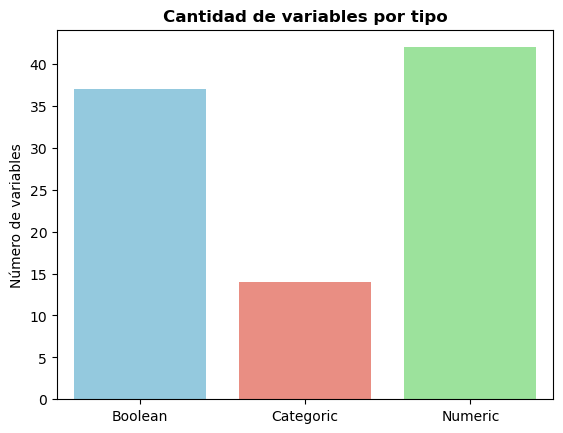

In [93]:
fig, ax = plt.subplots()
sns.barplot(data=var_types_count,x='Var_type',y='Count', palette=['skyblue','salmon','lightgreen'], ax=ax, hue='Var_type')
ax.set_title('Cantidad de variables por tipo', weight='bold')
ax.set_ylabel('Número de variables')
ax.set_xlabel('')
plt.show()

Generamos una gráfica que muestra el número de variables en cada categoría (Booleanas, Categóricas y Numéricas). Este gráfico proporciona una visión clara de la distribución de los diferentes tipos de datos en el dataset, ayudándonos a priorizar las transformaciones y análisis necesarios para cada grupo.

## Procesar y Limpiar variables

En esta sección nos enfocaremos en el tratamiento de valores faltantes (missing values) y en realizar transformaciones necesarias para hacer un preprocesamiento de los datos. Este paso es crucial para mejorar la calidad del dataset y reducir posibles sesgos derivados de información ausente o mal estructurada.

In [94]:
pd_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [95]:
weekdays={'MONDAY':1, 'TUESDAY':2, 'WEDNESDAY':3, 'THURSDAY':4, 'FRIDAY':5, 'SATURDAY':6, 'SUNDAY':7}

pd_data['WEEKDAY_APPR_PROCESS_START'] = pd_data['WEEKDAY_APPR_PROCESS_START']\
                                            .replace(weekdays).astype('int64')

C:\Users\anazb\AppData\Local\Temp\ipykernel_5576\423869178.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(weekdays).astype('int64')


El campo *WEEKDAY_APPR_PROCESS_START* indica el día de la semana en que se inició el proceso de aprobación de un préstamo. Hemos decidido codificar este campo con valores numéricos del 1 al 7, donde 1 corresponde a lunes (MONDAY) y 7 a domingo (SUNDAY). Esta transformación facilita su uso en futuros análisis, ya que convierte un dato categórico textual en uno numérico, compatible con la mayoría de los modelos.

Nota técnica: El aviso FutureWarning que aparece indica que el método .replace() puede sufrir cambios en el futuro. Por ahora, no afecta la ejecución, pero es recomendable estar atentos a actualizaciones en futuras versiones de pandas.

In [96]:
# Replace 'XNA' with NaN
pd_data = pd_data.replace('XNA', np.nan)

Hemos identificado que algunos campos contienen el valor *'XNA'*, utilizado como marcador para datos faltantes. Este valor no tiene significado semántico, por lo que lo hemos reemplazado por NaN (Not a Number) para un tratamiento uniforme de los valores faltantes.

### Selección de threshold por filas y columnas para eliminar missing values

Para identificar y eliminar columnas o filas con valores faltantes de manera significativa, hemos establecido un umbral (threshold) de tolerancia. Este umbral permite seleccionar aquellas columnas que tienen menos del 90% de valores faltantes, asegurándonos de no perder información relevante.

Antes de proceder con la eliminación de columnas y filas con valores faltantes, realizamos un análisis exploratorio para identificar cuántos datos faltan en cada columna y fila. Esto nos permite determinar qué partes del dataset están más incompletas y podrían afectar el análisis posterior.

La lista generada muestra las columnas y filas ordenadas de mayor a menor cantidad de valores faltantes, facilitando la priorización de decisiones.

In [97]:
pd_series_null_columns = pd_data.isnull().sum().sort_values(ascending=False)
pd_series_null_rows = pd_data.isnull().sum(axis=1).sort_values(ascending=False)
print(pd_series_null_columns.shape, pd_series_null_rows.shape)

(93,) (307511,)


In [98]:
pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['nulos_columnas'])     
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])  
pd_null_filas['target'] = pd_data['TARGET'].copy()
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/pd_data.shape[0]
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/pd_data.shape[1]

In [99]:
pd_null_columnas

,nulos_columnas,porcentaje_columnas
COMMONAREA_AVG,214865,0.698723
NONLIVINGAPARTMENTS_AVG,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_AVG,210199,0.683550
FLOORSMIN_AVG,208642,0.678486
YEARS_BUILD_AVG,204488,0.664978
OWN_CAR_AGE,202929,0.659908
LANDAREA_AVG,182590,0.593767
BASEMENTAREA_AVG,179943,0.585160
EXT_SOURCE_1,173378,0.563811


En la tabla generada, se observan las columnas ordenadas por el número y porcentaje de valores faltantes. Esto permite priorizar las columnas más completas para el análisis posterior.
Ejemplo: La columna *COMMONAREA_AVG* tiene el 69.87% de sus valores faltantes, lo que la hace una candidata para ser eliminada dependiendo de su relevancia.
Pero en este caso no vamos a eliminar ninguna columna, porque a pesar de tener muchos NA, sigue conteniendo mucha información. Siempre sería posible volver a correr el código cambiando el threshold a un número menor en caso de querer eliminar estas columnas.

In [100]:
threshold=0.9
list_vars_not_null = list(pd_null_columnas[pd_null_columnas['porcentaje_columnas']<threshold].index)
pd_data_filter_null = pd_data.loc[:, list_vars_not_null]
pd_data_filter_null.shape

(307511, 93)

In [101]:
pd_null_filas

,nulos_filas,target,porcentaje_filas
SK_ID_CURR,,,
255145,34,0,0.365591
235599,34,0,0.365591
412312,34,0,0.365591
315294,34,0,0.365591
412671,33,0,0.354839
...,...,...,...
347493,0,0,0.000000
347507,0,0,0.000000
201175,0,0,0.000000


Similar al caso de las columnas, hemos calculado el porcentaje de valores faltantes por fila. Este análisis nos ayudará a decidir si se eliminan filas específicas que tienen una cantidad significativa de datos ausentes, algo que finalmente no hemos hecho.

## Exportación parcial del DataSet

Para acabar el notebook 01, procedemos a exportar a un archivo CSV (df_data_1.csv), del estado actual del DataSet para facilitar su uso en la continuación de este análisis. Este archivo contiene un conjunto más limpio y manejable de datos, preparado para las tareas en el siguiente notebook.

In [102]:
pd_data_filter_null.to_csv('../data/df_data_1.csv')